This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [2]:
# Relative Risk with PTS
data = pd.read_csv("../csv/relative_1hr_lead_3hr_obs_data/relative_1hr_lead_3hr_obs_dataset_with_pts.csv")
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14338        3352386      0    683.0  45.0           36.0            36.0   
14339        3352563      0    863.0  34.0           54.0            54.0   
14340        3352747      0    706.0  30.0           31.0            31.0   
14341        3353044      0   3338.0  52.0           41.0            41.0   
14342        3353077      0   2870.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  0.0                4.0      2.0               0  ...   
1                  0.0                4.0      4.0               1  ...   
2                  1.0                4.0      2.0               0  ...   
3                  1.0                4.0      4.0               1  ...   
4                  0.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
14338              0.0                2.0      2.0               0  ...   
14339              0.0                4.0      2.0               0  ...   
14340              0.0                4.0      4.0               0  ...   
14341              0.0                4.0      2.0               0  ...   
14342              0.0                4.0      4.0               0  ...   

      comorbidity_rheumd comorbidity_coag comorbidity_obes comorbidity_wloss  \
0                      0                0                0                 0   
1                      0                0                0                 0   
2                      0                0                0                 0   
3                      0                0                0                 0   
4                      0                0                0                 0   
...                  ...              ...              ...               ...   
14338                  0                0                0                 0   
14339                  0                0                0                 0   
14340                  0                0                0                 0   
14341                  0                0                0                 0   
14342                  0                0                0                 0   

      comorbidity_fed comorbidity_blane comorbidity_dane comorbidity_alcohol  \
0                   0                 0                0                   0   
1                   0                 0                0                   0   
2                   0                 0                0                   0   
3                   0                 0                0                   0   
4                   0                 0                0                   1   
...               ...               ...              ...                 ...   
14338               0                 0                0                   0   
14339               0                 0                0                   0   
14340               0                 0                0                   0   
14341               1                 0                0                   0   
14342               0                 0                0                   0   

      comorbidity_drug comorbidity_depre  
0                    0                 0  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  
.

In [3]:
data = process_all(data)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14338        3352386      0    683.0  45.0           36.0            36.0   
14339        3352563      0    863.0  34.0           54.0            54.0   
14340        3352747      0    706.0  30.0           31.0            31.0   
14341        3353044      0   3338.0  52.0           41.0            41.0   
14342        3353077      0   2870.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
14338              0.0      2.0               0     1.0  ...   
14339              0.0      2.0               0     1.0  ...   
14340              0.0      4.0               0     0.0  ...   
14341              0.0      2.0               0     0.0  ...   
14342              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
14338                  0                     0                              0   
14339                  0                     0                              0   
14340                  0                     0                              0   
14341                  0                     0                              0   
14342                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
14338                     0                    0                   1   
14339                     0                    0                   1   
14340                     0                    0                   1   
14341                     0                    0                   1   
14342                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [4]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14338        3352386      0    683.0  45.0           36.0            36.0   
14339        3352563      0    863.0  34.0           54.0            54.0   
14340        3352747      0    706.0  30.0           31.0            31.0   
14341        3353044      0   3338.0  52.0           41.0            41.0   
14342        3353077      0   2870.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
14338              0.0      2.0               0     1.0  ...   
14339              0.0      2.0               0     1.0  ...   
14340              0.0      4.0               0     0.0  ...   
14341              0.0      2.0               0     0.0  ...   
14342              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
14338                  0                     0                              0   
14339                  0                     0                              0   
14340                  0                     0                              0   
14341                  0                     0                              0   
14342                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
14338                     0                    0                   1   
14339                     0                    0                   1   
14340                     0                    0                   1   
14341                     0                    0                   1   
14342                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [5]:
common_imputation= ["Gender", "UrgentAdmission"]
one_hot_removal =["UnitAdmitSource_Missing"]
remove = ["APACHEIVaScore", "relative_1hr_lead_3hr_obsHaloperidol", "relative_1hr_lead_3hr_obsPrecedex" ]#, "mean_motor_GCS", "mean_verbal_GCS", "mean_eyes_GCS", "mean_total_GCS"]

# common_imputation = ["Gender"]
# one_hot_removal = []
# remove = []

exceptions =["last_verbal_GCS", "last_eyes_GCS", "last_total_GCS"]

mean_imputation = data.columns 
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [6]:
from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [7]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

12581


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
15          200923.0  12885.0  79.0      84.000000              0.0      4.0   
18          213517.0  51425.0  49.0     117.000000              0.0      4.0   
26          242154.0   5580.0  46.0      77.000000              0.0      4.0   
27          242505.0   5840.0  90.0      78.000000              0.0      4.0   
28          246416.0   1314.0  89.0      65.000000              0.0      4.0   
...              ...      ...   ...            ...              ...      ...   
14227      3200031.0   3453.0  63.0      58.338915              0.0      4.0   
14228      3200331.0    673.0  23.0      79.000000              0.0      4.0   
14236      3328663.0  11215.0  48.0      77.000000              0.0      4.0   
14301      3343219.0    250.0  41.0      41.000000              0.0      2.0   
14327      3349777.0  24561.0  60.0      33.000000              0.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
15                1.0     1.0       162.60        99.20  ...   
18                1.0     1.0       188.00       130.50  ...   
26                0.0     1.0       157.48        53.09  ...   
27                0.0     1.0       165.10        61.80  ...   
28                0.0     0.0       177.80        75.00  ...   
...               ...     ...          ...          ...  ...   
14227             1.0     1.0       165.00        72.50  ...   
14228             1.0     1.0       173.00        50.90  ...   
14236             0.0     1.0       170.10       109.30  ...   
14301             0.0     1.0       165.10        90.70  ...   
14327             0.0     0.0       182.90        87.00  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15                    0.0                    0.0   
18                    0.0                    0.0   
26                    0.0                    0.0   
27                    0.0                    0.0   
28                    0.0                    0.0   
...                   ...                    ...   
14227                 0.0                    0.0   
14228                 0.0                    0.0   
14236                 0.0                    0.0   
14301                 0.0                    0.0   
14327                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                               0.0                   0.0   
18                               1.0                   0.0   
26                               0.0                   0.0   
27                               0.0                   0.0   
28                               0.0                   0.0   
...                              ...                   ...   
14227                            0.0                   0.0   
14228                            0.0                   0.0   
14236                            0.0                   0.0   
14301                            0.0                   0.0   
14327                            0.0                   0.0   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                     1.0                 0.0                   1.0   
18                     0.0                 1.0                   0.0   
26                     0.0                 1.0                   0.0   
27                     0.0                 1.0                   0.0   
28                     0.0                 1.0                   0.0   
...                    ...                 ...                   ...   
14227                  0.0                 0.0                   0.0   
14228                  0.0                 1.0                   0.0   
14236                  0.0                 1.0                   0.0   
14301                  0.0                 1.0                   0.0   
14327                  0.0                 1.0                   0.0   

       UnitStayType_Stepdown  UnitStayType

In [8]:
print(np.sum(labels==1))

2645


In [9]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID        LOS       Age  APACHEIVscore  UrgentAdmission  \
15          200923.0   2.569384  0.913318       1.013872        -0.341937   
18          213517.0  12.332256 -0.902761       2.343135        -0.341937   
26          242154.0   0.718897 -1.084369       0.731907        -0.341937   
27          242505.0   0.784760  1.579214       0.772188        -0.341937   
28          246416.0  -0.361757  1.518678       0.248539        -0.341937   
...              ...        ...       ...            ...              ...   
14227      3200031.0   0.180090 -0.055258      -0.019774        -0.341937   
14228      3200331.0  -0.524134 -2.476696       0.812468        -0.341937   
14236      3328663.0   2.146344 -0.963297       0.731907        -0.341937   
14301      3343219.0  -0.631287 -1.387049      -0.718198        -0.341937   
14327      3349777.0   5.527124 -0.236865      -1.040443        -0.341937   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
15     0.863069        1.137414  1.056856    -0.326891     0.551003  ...   
18     0.863069        1.137414  1.056856     1.043301     1.698542  ...   
26     0.863069       -0.879188  1.056856    -0.603088    -1.139509  ...   
27     0.863069       -0.879188  1.056856    -0.192030    -0.820177  ...   
28     0.863069       -0.879188 -0.946203     0.493066    -0.336231  ...   
...         ...             ...       ...          ...          ...  ...   
14227  0.863069        1.137414  1.056856    -0.197424    -0.427888  ...   
14228  0.863069        1.137414  1.056856     0.234132    -1.219800  ...   
14236  0.863069       -0.879188  1.056856     0.077693     0.921296  ...   
14301 -1.723807       -0.879188  1.056856    -0.192030     0.239371  ...   
14327  0.863069       -0.879188 -0.946203     0.768184     0.103720  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15              -0.278902              -0.043718   
18              -0.278902              -0.043718   
26              -0.278902              -0.043718   
27              -0.278902              -0.043718   
28              -0.278902              -0.043718   
...                   ...                    ...   
14227           -0.278902              -0.043718   
14228           -0.278902              -0.043718   
14236           -0.278902              -0.043718   
14301           -0.278902              -0.043718   
14327           -0.278902              -0.043718   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                         -0.217845             -0.230938   
18                          4.590417             -0.230938   
26                         -0.217845             -0.230938   
27                         -0.217845             -0.230938   
28                         -0.217845             -0.230938   
...                              ...                   ...   
14227                      -0.217845             -0.230938   
14228                      -0.217845             -0.230938   
14236                      -0.217845             -0.230938   
14301                      -0.217845             -0.230938   
14327                      -0.217845             -0.230938   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                6.664741           -2.740835              4.040941   
18               -0.150043            0.364852             -0.247467   
26               -0.150043            0.364852             -0.247467   
27               -0.150043            0.364852             -0.247467   
28               -0.150043            0.364852             -0.247467   
...                    ...                 ...                   ...   
14227            -0.150043           -2.740835             -0.247467   
14228            -0.150043            0.364852             -0.247467   
14236            -0.150043            0.364852             -0.247467   
14301            -0.150043            0.364852             -0.247467   
14327  

# Visualize Data

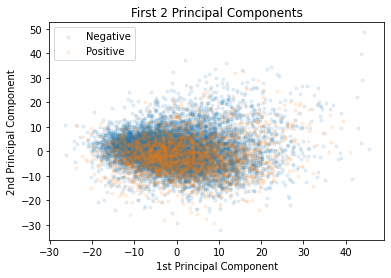

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

# Logistic Regression

In [11]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_1hr_lead_3hr_obs_data/relative_1hr_lead_3hr_obs", calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


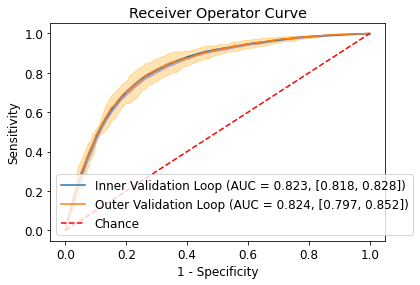

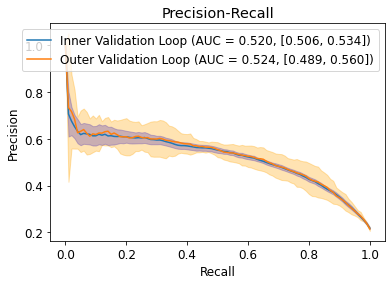

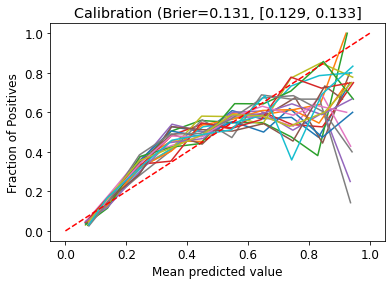

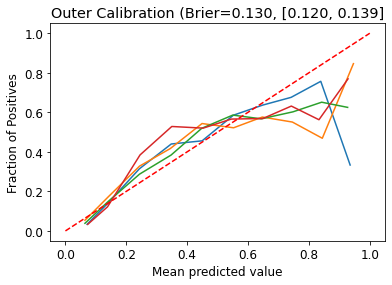

In [12]:
result_dict = lr_calibrated
name = "relative_1hr_lead_3hr_obs/mean_unpruned_pts/lr_calibrated"
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.02, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [14]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])
import pickle as pickle
with open("../pickle/relative_1hr_lead_3hr_obs/mean_unpruned_pts/lr_calibrated_selected_feats.pkl", "wb") as f:
    pickle.dump(selected_feat, f)

182
LOS
Age
APACHEIVscore
UrgentAdmission
TeachingStatus
Gender
AdmitHeight
HistAngina
HistArrythmia
HistCABG
HistExerciseTol
HistPulmEmb
HistHeartTransp
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistPUD
HistChemotherapy
HistRadiationTherapy
HistHemolyticAnemia
HistOncology
HistImmuneSuppr
HistDementia
HistNeuromuscularDis
HistSeizures
HistTIA
HistRespiratoryFail
HistRestrictiveDis
relative_1hr_lead_3hr_obsAdrenergicBronchodilators
relative_1hr_lead_3hr_obsaminoglycosides
relative_1hr_lead_3hr_obsAnticholinergicBronchodilators
relative_1hr_lead_3hr_obsAnticoagulants
relative_1hr_lead_3hr_obsAntidiarrheals
relative_1hr_lead_3hr_obsAntihistamines
relative_1hr_lead_3hr_obsBenzodiazepines
relative_1hr_lead_3hr_obsCephalosporins
relative_1hr_lead_3hr_obsDiuretics
relative_1hr_lead_3hr_obsGeneralAnesthetics
relative_1hr_lead_3hr_obsGlycopeptides
relative_1hr_lead_3hr_obsH2Blockers
relative_1hr_lead_3hr_obsInsulins
relative_1hr_lead_3hr_obsLaxatives
relative_1hr_lead_3hr_obsLincomycins
re

In [15]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])
with open("../pickle/relative_1hr_lead_3hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl", "wb") as f:
    pickle.dump(dropped_feat, f)

nd__attr_"intercept"__chunk_len_5__f_agg_"mean"
hr_value__linear_trend__attr_"intercept"
hr_value__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"max"
hr_value__median
hr_value__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20)
hr_value__quantile__q_0.4
hr_value__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"min"
hr_value__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20)
hr_value__quantile__q_0.3
hr_value__cwt_coefficients__coeff_4__w_10__wi

In [10]:
with open("../pickle/relative_1hr_lead_3hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl", "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [17]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

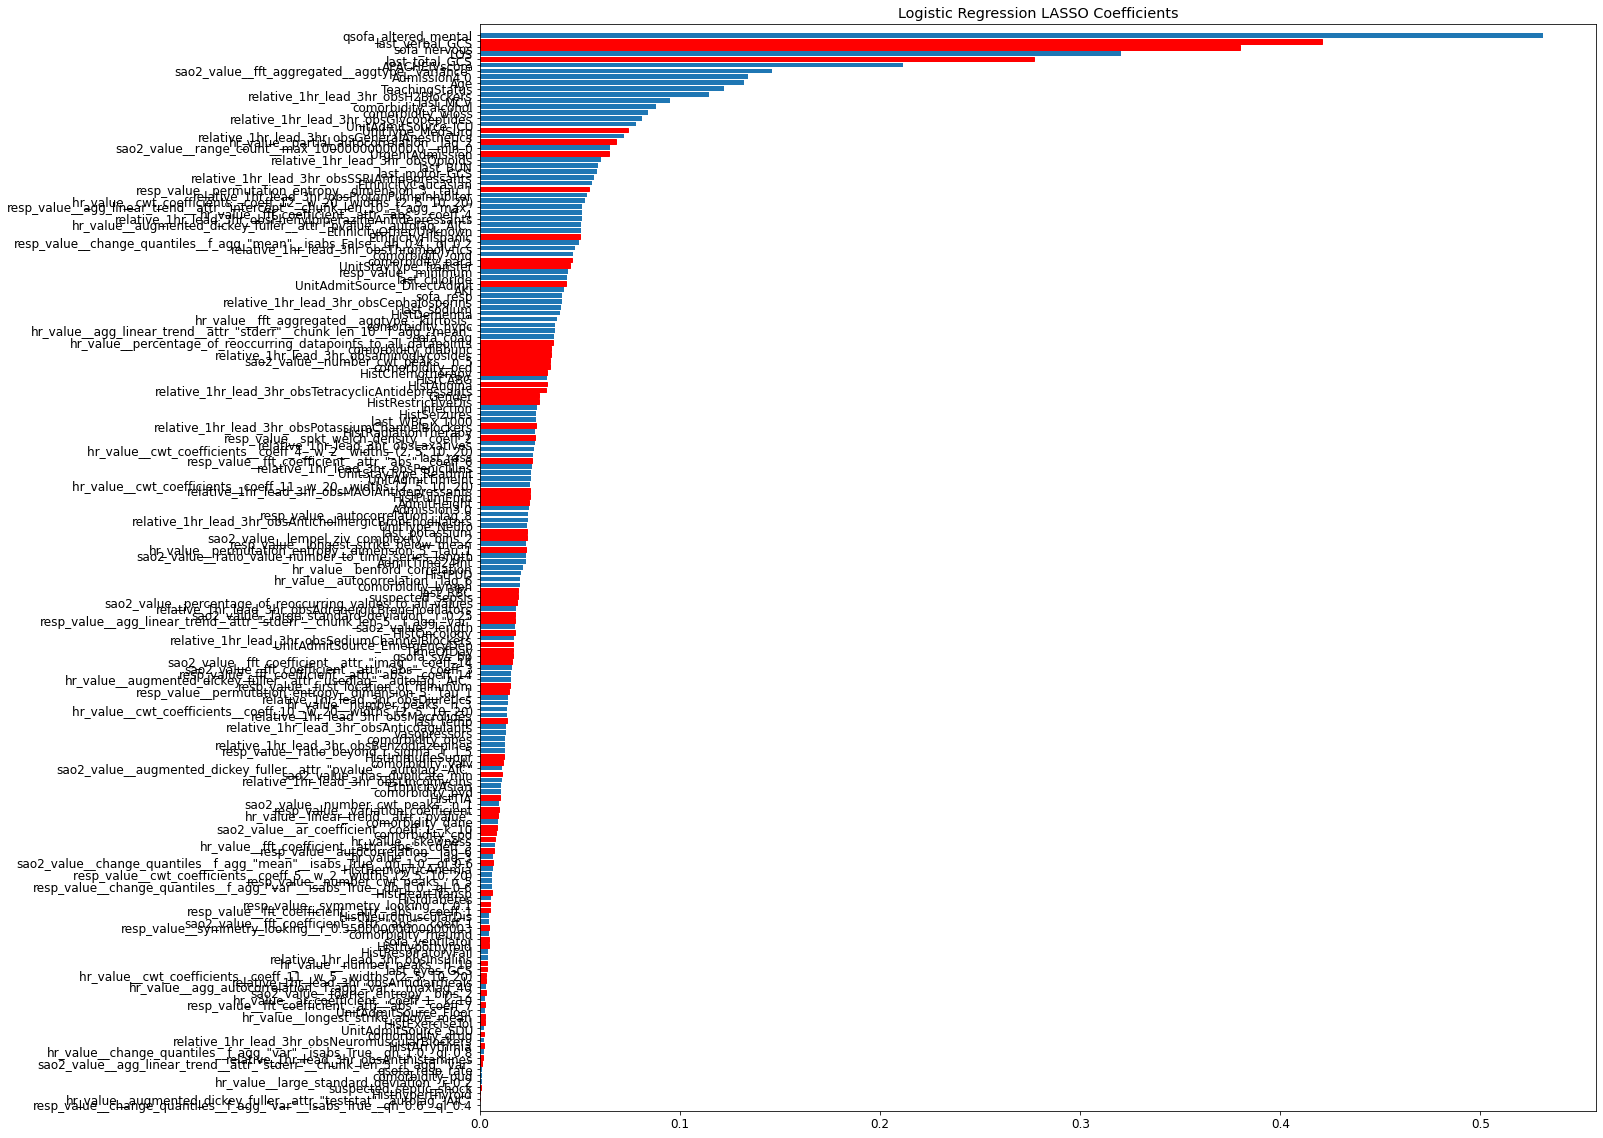

In [18]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

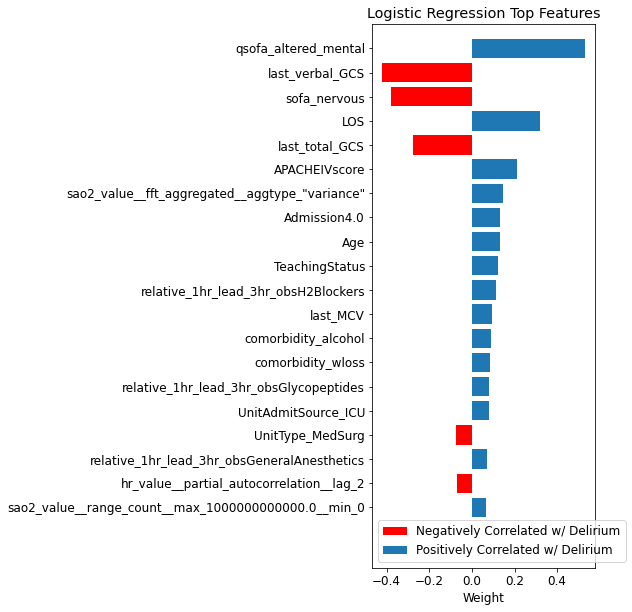

In [19]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_1hr_lead_3hr_obs/mean_unpruned_pts/lr_calibrated_coefficients_short.png', dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

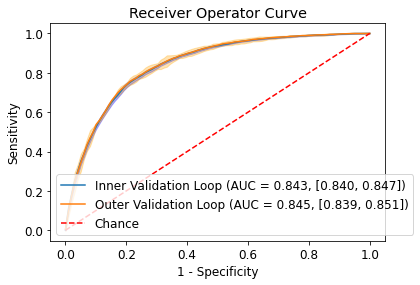

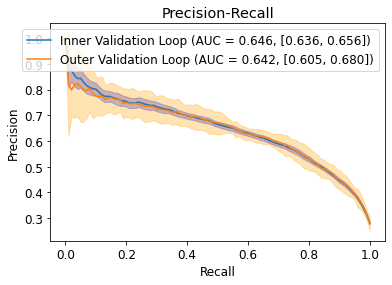

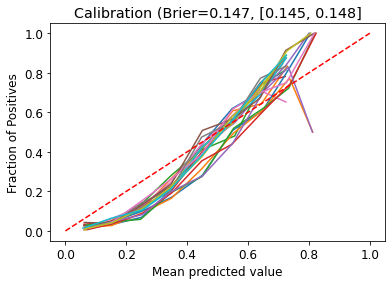

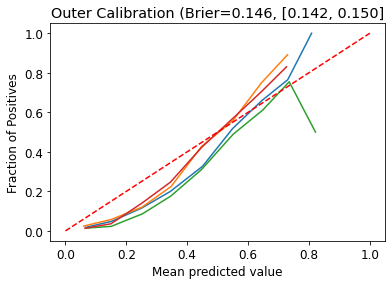

In [25]:
with open("../pickle/relative_1hr_lead_3hr_obs/mean_pruned_pts/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_3hr_obs/mean_pruned_pts/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

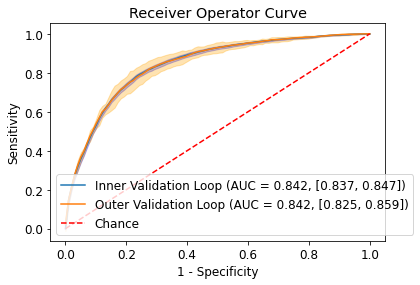

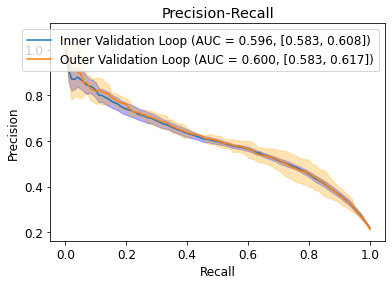

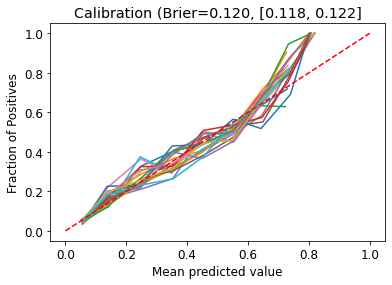

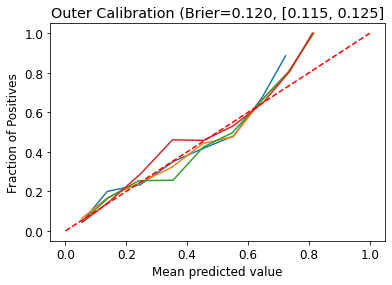

In [2]:
with open("../pickle/relative_1hr_lead_3hr_obs/mean_pruned_pts/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_3hr_obs/mean_pruned_pts/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

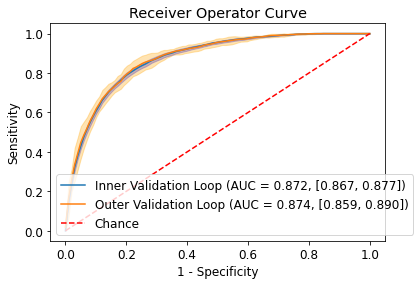

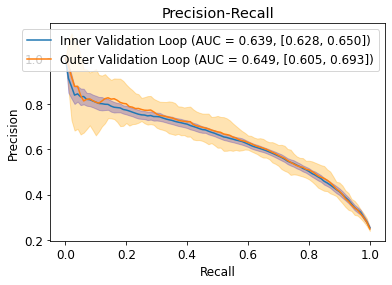

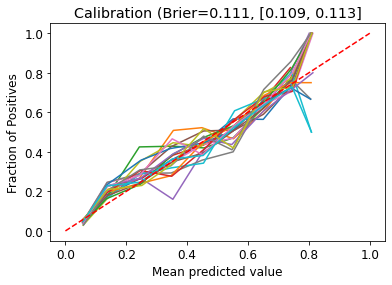

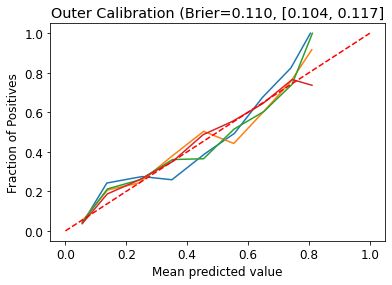

In [11]:
with open("../pickle/relative_1hr_lead_3hr_obs/mean_unpruned_pts/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_3hr_obs/mean_unpruned_pts/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

import shap
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
# clf.fit(data_pruned.iloc[:,1:], labels)
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
# shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
# plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

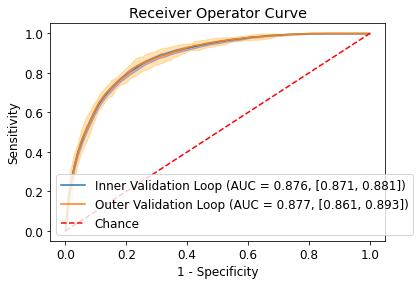

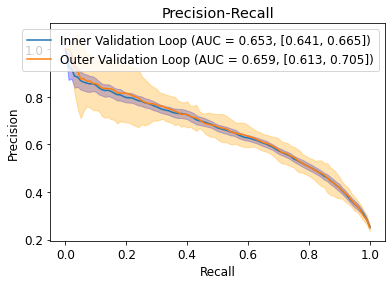

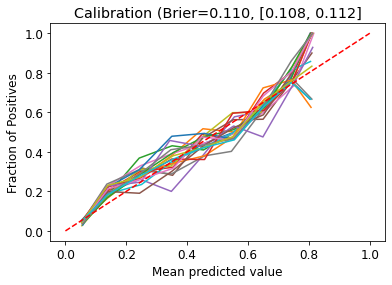

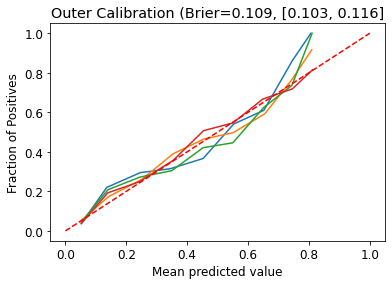

In [12]:
with open("../pickle/relative_1hr_lead_3hr_obs/mean_pruned_pts/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_3hr_obs/mean_pruned_pts/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

import shap
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
# clf.fit(data_pruned.iloc[:,1:], labels)
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
# shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
# plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")